<a href="https://colab.research.google.com/github/byarciptap/Cat_vs_Dog_Image_Classification/blob/main/Image_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cat vs Dog Image Classification using CNN**

Name :    Byar Cipta Pakartilinuwih

Profile Dicoding : https://www.dicoding.com/users/byarcipta/academies


# **About the Project**
This notebook was created to fulfill the final project of the course Dicoding: *Belajar Pengembangan Machine Learning*. As additional information, this project will use Artificial Neural Networks with **Tensor Flow** and **Sequential** models with Convolutional MaxPooling Layer. This model obtained an **accuracy** of around **84%** on training data and **88%** on validation data. The dataset used is sourced from Kaggle, with the proportion of training data and validation data set at **80:20**.

# **Import Libraries**

In [ ]:
import os
import zipfile
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt



#**Data Preparation**

In [ ]:
# upload kaggle json
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


## **Install Kaggle and Download Dataset**

In [ ]:
# install and download kaggle dataset
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Dogs vs Cats dataset
!kaggle datasets download -d chetankv/dogs-cats-images -p /tmp

dogs-cats-images.zip: Skipping, found more recently modified local copy (use --force to force download)


## **Extract Dataset**

In [ ]:
# Ekstrak dataset
zip_path = '/tmp/dogs-cats-images.zip'
extract_path = '/tmp/dogs-cats-images'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
for dirpath, dirnames, filenames in os.walk("/tmp/dogs-cats-images"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/tmp/dogs-cats-images'.
There are 2 directories and 0 images in '/tmp/dogs-cats-images/dataset'.
There are 2 directories and 0 images in '/tmp/dogs-cats-images/dataset/test_set'.
There are 0 directories and 1000 images in '/tmp/dogs-cats-images/dataset/test_set/dogs'.
There are 0 directories and 1000 images in '/tmp/dogs-cats-images/dataset/test_set/cats'.
There are 2 directories and 0 images in '/tmp/dogs-cats-images/dataset/training_set'.
There are 0 directories and 4000 images in '/tmp/dogs-cats-images/dataset/training_set/dogs'.
There are 0 directories and 4000 images in '/tmp/dogs-cats-images/dataset/training_set/cats'.
There are 1 directories and 0 images in '/tmp/dogs-cats-images/dog vs cat'.
There are 2 directories and 0 images in '/tmp/dogs-cats-images/dog vs cat/dataset'.
There are 2 directories and 0 images in '/tmp/dogs-cats-images/dog vs cat/dataset/test_set'.
There are 0 directories and 1000 images in '/tmp/dogs-cats-images/dog vs 

# **Let's look at some of the images from training and validation set.**

In [ ]:
train_cat_dir = "/tmp/dogs-cats-images/dataset/training_set/cats"
train_dog_dir = "/tmp/dogs-cats-images/dataset/training_set/dogs/"
validation_cat_dir = "/tmp/dogs-cats-images/dataset/test_set/cats/"
validation_dog_dir = "/tmp/dogs-cats-images/dataset/test_set//dogs/"

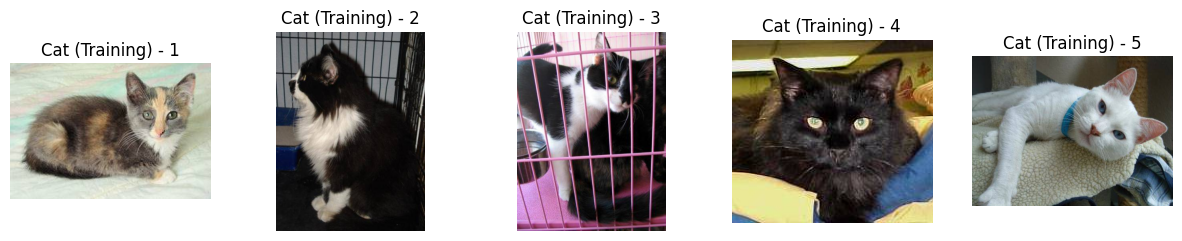

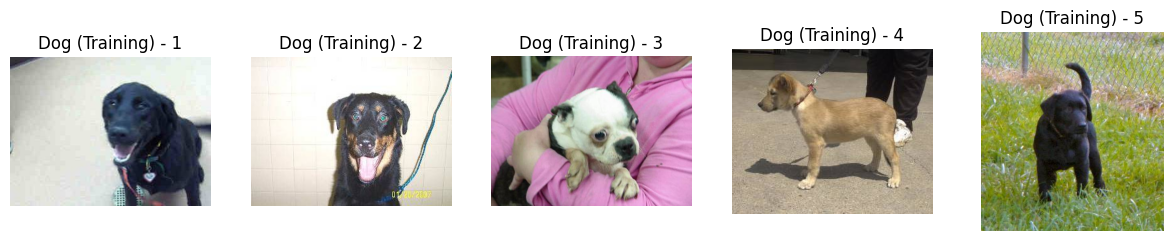

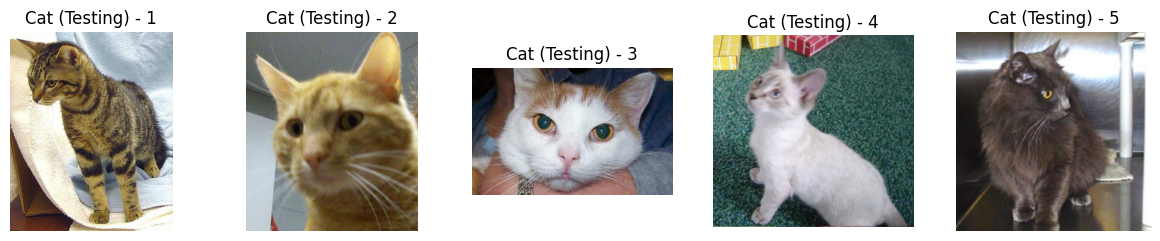

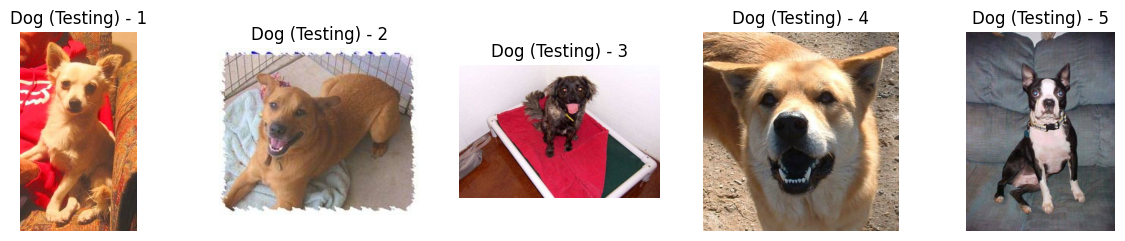

In [ ]:
# Fungsi untuk menampilkan gambar-gambar dari direktori
def show_images(directory, label):
    plt.figure(figsize=(15, 15))
    files = os.listdir(directory)[:5]  # Mengambil 5 gambar pertama
    for i, file in enumerate(files, 1):
        img_path = os.path.join(directory, file)
        img = mpimg.imread(img_path)
        plt.subplot(5, 5, i)
        plt.imshow(img)
        plt.title(f'{label} - {i}')
        plt.axis('off')

# Menampilkan gambar dari dataset training
show_images(train_cat_dir, 'Cat (Training)')
show_images(train_dog_dir, 'Dog (Training)')

# Menampilkan gambar dari dataset testing
show_images(validation_cat_dir, 'Cat (Testing)')
show_images(validation_dog_dir, 'Dog (Testing)')

plt.show()

# **Image Augmentasion**

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [ ]:
train_generator = train_datagen.flow_from_directory("/tmp/dogs-cats-images/dataset/training_set",
                                                    batch_size = 40,
                                                    class_mode = 'binary',
                                                    target_size = (150, 150))

validation_generator =  test_datagen.flow_from_directory( "/tmp/dogs-cats-images/dataset/test_set/",
                                                          batch_size  = 40,
                                                          class_mode  = 'binary',
                                                          target_size = (150, 150))

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


dataset telah terbagi menjadi 80% training data dan 20% test data

# **Data Modelling**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

## **Visualization of artificial neural network models**

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pkg-config is already the newest version (0.29.2-1ubuntu3).
graphviz is already the newest version (2.42.2-6).
python3-dev is already the newest version (3.10.6-1~22.04).
python3-dev set to manually installed.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 35 not upgraded.
Need to get 2,433 kB of archives.
After t

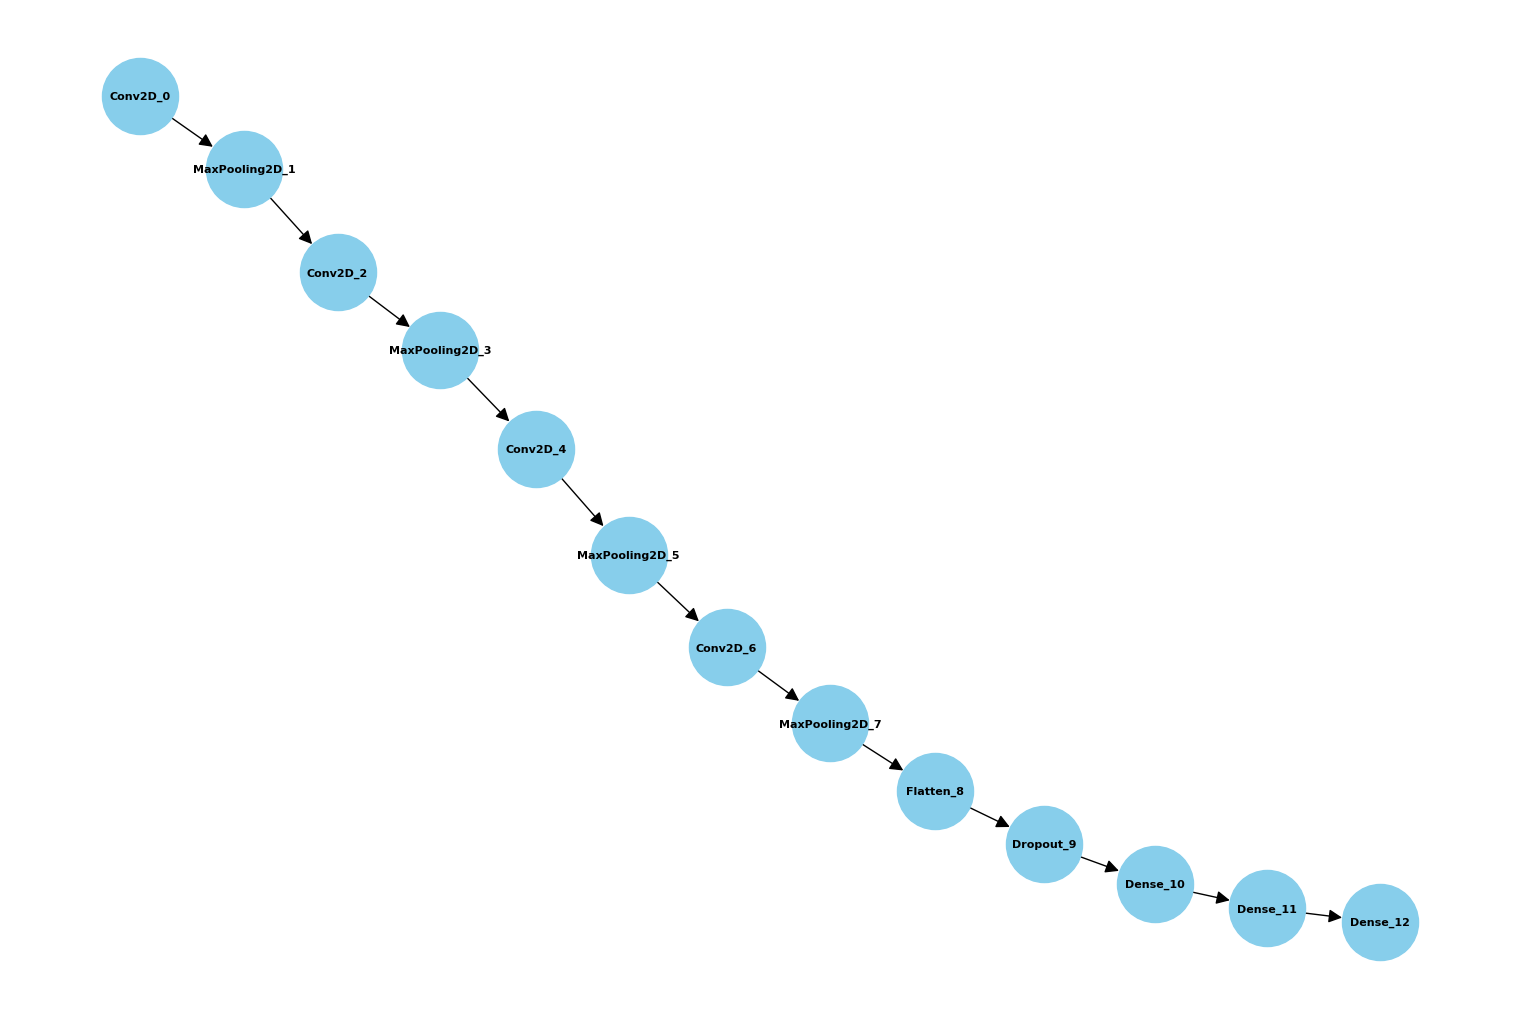

In [ ]:
#Visualize artificial neural network models

!pip install pydot
!apt-get install -y graphviz
!pip install graphviz
!apt-get install -y python3-dev graphviz libgraphviz-dev pkg-config
!pip install pygraphviz

import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph based on the model architecture
for i, layer in enumerate(model.layers):
    layer_type = layer.__class__.__name__
    G.add_node(f'{layer_type}_{i}', label=f'{layer_type}\n{layer.output_shape[1:]}')
    if i > 0:
        G.add_edge(f'{model.layers[i-1].__class__.__name__}_{i-1}', f'{layer_type}_{i}')

# Set up the plot
pos = graphviz_layout(G, prog='neato')
plt.figure(figsize=(15, 10))

# Draw the graph
nx.draw(G, pos, with_labels=True, arrowsize=20, node_size=3000, node_color="skyblue", font_size=8, font_color="black", font_weight="bold")

# Show the plot
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# Model callback to stop training if accuracy > 0.84
class MyCallbackStopTraining(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.84:
            print("\nThe model accuracy has reached more than 85%, training data is stopped.")
            self.model.stop_training = True

## **Training the model**

In [ ]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=64,
                              epochs=100,
                              validation_steps=10,
                              verbose=2,
                              callbacks=[MyCallbackStopTraining()]
                    )

Epoch 1/100
64/64 - 99s - loss: 0.6965 - accuracy: 0.5156 - val_loss: 0.6927 - val_accuracy: 0.5075 - 99s/epoch - 2s/step
Epoch 2/100
64/64 - 83s - loss: 0.6894 - accuracy: 0.5371 - val_loss: 0.6804 - val_accuracy: 0.5900 - 83s/epoch - 1s/step
Epoch 3/100
64/64 - 85s - loss: 0.6885 - accuracy: 0.5484 - val_loss: 0.6543 - val_accuracy: 0.6475 - 85s/epoch - 1s/step
Epoch 4/100
64/64 - 85s - loss: 0.6796 - accuracy: 0.5785 - val_loss: 0.6676 - val_accuracy: 0.5625 - 85s/epoch - 1s/step
Epoch 5/100
64/64 - 82s - loss: 0.6696 - accuracy: 0.6031 - val_loss: 0.6291 - val_accuracy: 0.6600 - 82s/epoch - 1s/step
Epoch 6/100
64/64 - 87s - loss: 0.6593 - accuracy: 0.5961 - val_loss: 0.6345 - val_accuracy: 0.6525 - 87s/epoch - 1s/step
Epoch 7/100
64/64 - 84s - loss: 0.6407 - accuracy: 0.6246 - val_loss: 0.6329 - val_accuracy: 0.6075 - 84s/epoch - 1s/step
Epoch 8/100
64/64 - 83s - loss: 0.6393 - accuracy: 0.6359 - val_loss: 0.5473 - val_accuracy: 0.7350 - 83s/epoch - 1s/step
Epoch 9/100
64/64 - 84s 

# **Comparison of Training and Validation Accuracy Over Epochs**

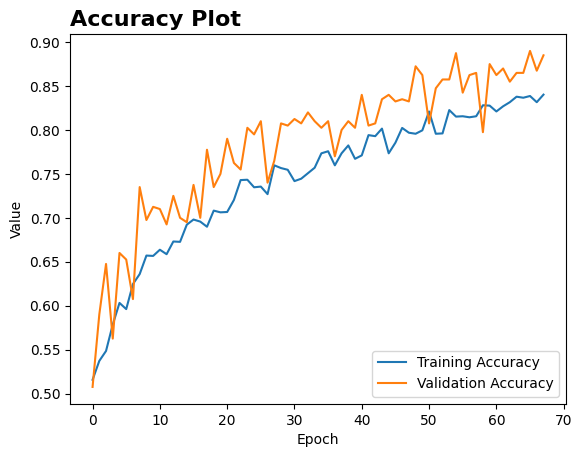

In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot', fontweight="bold", loc="left", fontsize="16")
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

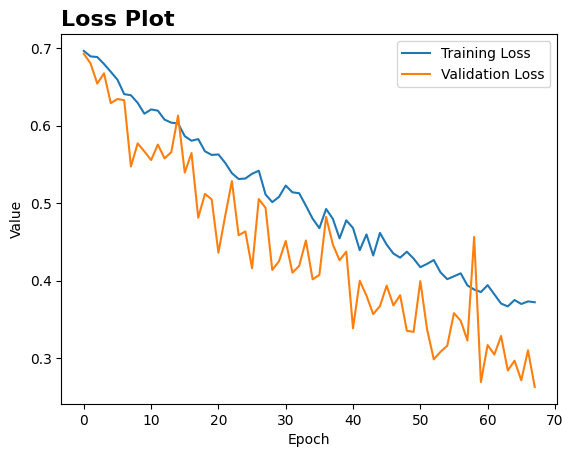

In [ ]:
# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot', fontweight="bold", loc="left", fontsize="16")
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

# **Saved Model into TF-Lite**

In [ ]:
# Simpan model ke dalam file TensorFlow Lite
tflite_model_path = "/content/drive/MyDrive/Dicoding/model.tflite"

# Konversi model ke format TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Tulis model ke dalam file
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print(f"Model TensorFlow Lite berhasil disimpan di: {tflite_model_path}")


Model TensorFlow Lite berhasil disimpan di: /content/drive/MyDrive/Dicoding/model.tflite
